In [1]:
import pandas as pd, numpy as np, seaborn as sns


In [2]:
hdata = pd.read_csv('home.csv', sep='\t')

In [3]:
hdata

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [4]:
x=hdata[['SqFt','Bedrooms','Bathrooms','Offers']]
y=hdata.Price

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
stdScaler = StandardScaler()

In [9]:
stdScaler.fit(x_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
x_train_std = stdScaler.transform(x_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [11]:
x_test_std = stdScaler.transform(x_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
houseModel = LinearRegression()

In [14]:
houseModel.fit(x_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print("Slope Value:", houseModel.coef_)
print("Intercept Value:", houseModel.intercept_)

Slope Value: [ 13369.34853583   7824.71732801   6160.93652428 -14287.18536633]
Intercept Value: 129307.29166666667


In [16]:
#Price = 10560.80407807*stdSqft + 9707.23143049*stdBedrooms + 129078.125

In [17]:
print( "Train score", houseModel.score(x_train_std,y_train))
print( "Test score", houseModel.score(x_test_std,y_test))

Train score 0.7015129362519487
Test score 0.6776076543710579


In [18]:
pd.get_dummies(data=hdata, columns=['Brick'],drop_first=True)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Brick_Yes
0,1,114300,1790,2,2,2,East,0
1,2,114200,2030,4,2,3,East,0
2,3,114800,1740,3,2,1,East,0
3,4,94700,1980,3,2,3,East,0
4,5,119800,2130,3,3,3,East,0
5,6,114600,1780,3,2,2,North,0
6,7,151600,1830,3,3,3,West,1
7,8,150700,2160,4,2,2,West,0
8,9,119200,2110,4,2,3,East,0
9,10,104000,1730,3,3,3,East,0


In [19]:
house_dummy = pd.get_dummies(data=hdata, columns=['Brick','Neighborhood'],drop_first=True)

In [20]:
house_dummy

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0
5,6,114600,1780,3,2,2,0,1,0
6,7,151600,1830,3,3,3,1,0,1
7,8,150700,2160,4,2,2,0,0,1
8,9,119200,2110,4,2,3,0,0,0
9,10,104000,1730,3,3,3,0,0,0


In [21]:
x_dummy = house_dummy.iloc[0:,2:]
y_dummy = house_dummy.Price

In [22]:
x_train_dummy,x_test_dummy,y_train_dummy,y_test_dummy=train_test_split(x_dummy,y_dummy)

In [23]:
stdScaler = StandardScaler()

In [24]:
stdScaler.fit(x_train_dummy)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
x_test_std_dummy = stdScaler.transform(x_test_dummy)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [26]:
x_train_std_dummy = stdScaler.transform(x_train_dummy)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [27]:
houseModel = LinearRegression()

In [28]:
houseModel.fit(x_train_std_dummy, y_train_dummy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print( "Train score", houseModel.score(x_train_std_dummy,y_train_dummy))
print( "Test score", houseModel.score(x_test_std_dummy,y_test_dummy))

Train score 0.8655239799991052
Test score 0.8643815220091048


In [30]:
y_train_predicted = houseModel.predict(x_train_std_dummy)
y_test_predicted = houseModel.predict(x_test_std_dummy)

In [31]:
y_train_predicted

array([168770.26350511,  95955.04921194, 121586.3411793 , 158859.20599139,
       108113.22375206, 162691.32530421, 153514.88902611, 140300.14567448,
       176601.98649655, 115271.20973419, 150257.05855716, 131808.42254928,
       127358.84829761, 113042.87633335, 129605.96532401, 117311.84086157,
       124948.70960549, 111052.93781473, 103925.42078185, 135714.62150049,
       159066.88745824, 108853.8777953 ,  85285.69592506, 106651.42057003,
       162917.79039662, 185122.97237278, 112912.46220053, 171095.84343338,
       141112.53126226, 166486.64472183,  93174.90593695,  94384.367851  ,
       132672.70694405, 130316.2040902 , 120407.3482145 , 154947.41882672,
       116002.43376396, 169817.40230314, 149632.36461245, 128961.43864176,
       187063.65831659, 131860.32135627, 116716.56675412, 141112.53126226,
       111940.45215289, 126781.16224789, 170626.39068507,  99601.66788932,
       119604.3926402 , 111634.02107029, 107310.26817776, 119519.83387635,
       178253.82941551, 1

In [32]:
y_test_predicted

array([153035.49861579, 114166.58391571, 126040.50820465, 143218.42987941,
       148340.04715091, 101217.00905139, 182081.05781633, 111498.07114798,
       129430.89139006, 137807.69289832, 210650.62381239, 138835.9943986 ,
        99339.89660786,  94357.2961076 , 141408.45620674, 158181.5747581 ,
       127850.78001564, 119685.55419821, 160456.95909574, 148424.60591476,
       116562.47808375, 137807.69289832, 137184.15147964, 168135.09043494,
       135316.39264819, 161087.03174371, 143109.55170049, 116608.33345271,
        95377.36316222,  97651.55193203, 117952.54972125, 126519.39096643])

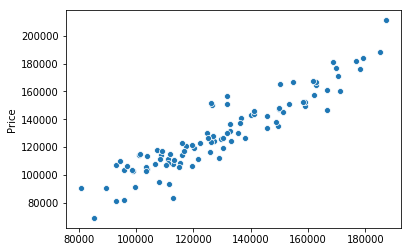

In [33]:
sns.scatterplot(y_train_predicted,y_train_dummy)

In [34]:
hdata = pd.read_csv('house_new.csv', sep='\t')

In [35]:
house_new = pd.get_dummies(data=hdata, columns=['Brick','Neighborhood'],drop_first=True)

In [36]:
x_dummy = house_new.iloc[0:,1:]

In [37]:
x_test_std_dummy = stdScaler.transform(x_dummy)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [38]:
y_train = houseModel.predict(x_test_std_dummy)

In [39]:
y_train

array([122541.20813744,  69892.48196389, 108156.63887085, 103803.00673123,
        39223.265102  ,  94820.52948602, 109206.00297536,  82217.65285979,
        79205.97267039,  57228.35291858])

In [40]:
from sklearn.externals import joblib

In [41]:
joblib.dump(stdScaler, "StandardScalerOnHouse.sav")
joblib.dump(houseModel, "HousePriceModel.sav")

['HousePriceModel.sav']

In [42]:
stdHouse = joblib.load("StandardScalerOnHouse.sav")
hpModel = joblib.load("HousePriceModel.sav")

In [43]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [44]:
ridgeModel = Ridge(alpha=0.1)

In [45]:
fdata = pd.read_csv('flower.csv', sep='\t')

In [46]:
fdata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [47]:
x=fdata[['sepal length (cm)','petal length (cm)']]

In [48]:
y=fdata.Species

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
irisModel = LogisticRegression()

In [52]:
irisModel.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
irisModel.score(x_train,y_train)

0.9464285714285714

In [54]:
irisModel.score(x_test,y_test)

0.8947368421052632

In [55]:
y_train_pred = irisModel.predict(x_train)
pd.crosstab(y_train,y_train_pred)

col_0,0,1,2
Species,,,
0,37,0,0
1,0,33,6
2,0,0,36


In [73]:
!pip3 install mlxtend

  Using cached https://files.pythonhosted.org/packages/52/04/c362f34f666f0ddc7cf593805e64d64fa670ed96fd9302e68549dd48287d/mlxtend-0.17.0-py2.py3-none-any.whl


In [82]:
from mlxtend.plotting import plot_decision_regions

In [84]:
from matplotlib import pyplot as plt

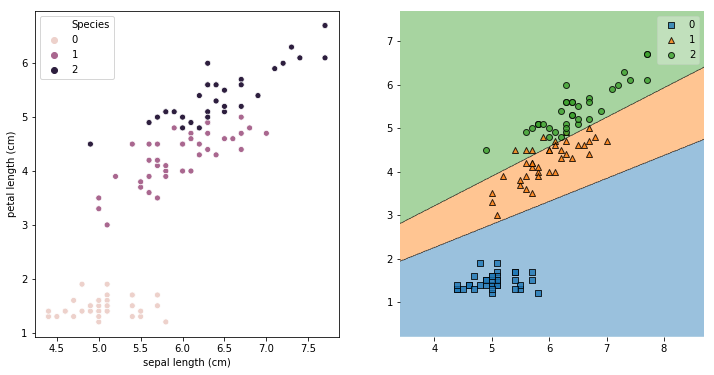

In [85]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(x_train['sepal length (cm)'],x_train['petal length (cm)'],
                hue=y_train)
plt.subplot(122)
plot_decision_regions(x_train.values,y_train.values,clf=irisModel)
plt.show()

In [87]:
    import numpy as np
x_new = np.array([[4.5, 7.2], [4.2, 0.95]])


In [88]:
irisModel.predict(x_new)

array([2, 0])

In [91]:
x = fdata.iloc[0:,0:-1]
y =fdata.Species
irisModel = LogisticRegression()
irisModel.fit(x_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
print("Train score", irisModel.score(x_train, y_train))
print("Train score", irisModel.score(x_test, y_test))


Train score 0.9464285714285714
Train score 0.8947368421052632


In [94]:
irisModel = LogisticRegression(C=100)
irisModel.fit(x_train, y_train)
print("Train score", irisModel.score(x_train, y_train))
print("Train score", irisModel.score(x_test, y_test))


Train score 0.9642857142857143
Train score 0.9473684210526315


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [75]:
tdata = pd.read_csv('titanic.csv','\t')

In [76]:
tdata

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [96]:
tdata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
def get_title(name):
    if "." in name:
        return (name.split(",")[1].split(".")[0].strip())
    else:
        return "Empty"

In [106]:
tdata["Title"] = tdata.Name.apply(get_title)

In [107]:
tdata.groupby('Title')['Age'].agg(['mean','median'])

,mean,median
Title,,
Capt,70.000000,70.0
Col,58.000000,58.0
Don,40.000000,40.0
Dr,42.000000,46.5
Jonkheer,38.000000,38.0
Lady,48.000000,48.0
Major,48.500000,48.5
Master,4.574167,3.5
Miss,21.773973,21.0


In [109]:
tdata['Age']=tdata.groupby('Title')['Age'].transform(lambda x:x.fillna(x.mean()))

In [110]:
tdata

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs


In [113]:
tdata[tdata.PassengerId==66]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
65,66,1,3,"Moubarek, Master. Gerios",male,4.574167,1,1,2661,15.2458,NaN,C,Master


In [116]:
tdata_new = tdata.drop(columns=['Name','PassengerId','Fare','Ticket','Title','Cabin'])

In [119]:
tdata_new.dropna(inplace=True)

In [123]:
tdata_new_dummies = pd.get_dummies(data=tdata_new,columns=['Pclass','Gender','Embarked'],drop_first=True)

In [124]:
x=tdata_new_dummies[['Age','SibSp','Parch','Pclass_2','Pclass_3','Gender_male','Embarked_Q','Embarked_S']]

In [125]:
y=tdata_new_dummies['Survived']

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [145]:
stdScaler = StandardScaler() 

In [147]:
stdScaler.fit(x_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [150]:
x_train_std = stdScaler.transform(x_train)
x_test_std = stdScaler.transform(x_test)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [164]:
tmodel = LogisticRegression(C=10)

In [165]:
tmodel.fit(x_train_std,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [166]:
tmodel.score(x_train_std,y_train)

0.7957957957957958

In [167]:
tmodel.score(x_test_std,y_test)

0.8340807174887892

In [155]:
y_train_pred = tmodel.predict(x_train_std)

In [156]:
pd.crosstab(y_train,y_train_pred)

col_0,0,1
Survived,,
0,362,53
1,83,168
